<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/TTF_predict_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("DATA.csv")
data.head()

,data,TTF,HH
0,2021/9/6,18.15,4.71
1,2021/9/7,18.61,4.57
2,2021/9/8,18.97,4.91
3,2021/9/9,19.54,5.03
4,2021/9/10,20.10,4.94


In [3]:
price=data.loc[:,'TTF']
price.head(10)

0    18.15
1    18.61
2    18.97
3    19.54
4    20.10
5    21.30
6    22.78
7    22.70
8    21.00
9    22.56
Name: TTF, dtype: float64

In [4]:
price_norm=price/max(price)
price_norm

0      0.188219
1      0.192990
2      0.196723
3      0.202634
4      0.208441
         ...   
328    0.288396
329    0.267863
330    0.254900
331    0.257389
332    0.245982
Name: TTF, Length: 333, dtype: float64

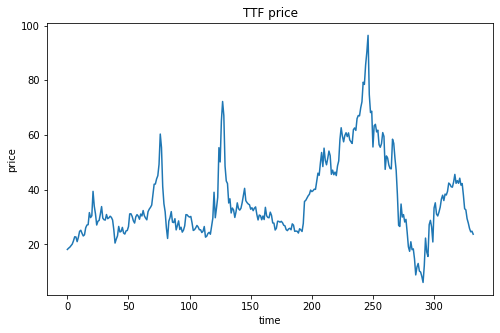

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1=plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('TTF price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [6]:
len(data)

333

In [7]:
time_step=6

In [8]:
def extract_data(data,time_step):
  X=[]
  y=[]
  for i in range(len(data)-time_step):
    X.append([a for a in data[i:i+time_step]])
    y.append(data[i+time_step])
  X=np.array(X)
  X=X.reshape(X.shape[0],X.shape[1],1)
  return X,y

In [9]:
X,y=extract_data(price_norm,time_step)

In [10]:
X[0,:,:]

array([[0.18821943],
       [0.19298973],
       [0.19672301],
       [0.20263404],
       [0.20844136],
       [0.22088562]])

In [11]:
y

[0.23623353728092916,
 0.23540391994192678,
 0.21777455148812608,
 0.23395208959867259,
 0.2567665664212382,
 0.26101835528362544,
 0.24919630820284144,
 0.23934460230218807,
 0.2435963911645753,
 0.27024784818002695,
 0.2807217670849321,
 0.28217359742818626,
 0.3279062532406927,
 0.30892875661101316,
 0.31587680182515815,
 0.40848283729129936,
 0.35248366690863836,
 0.3228248470393031,
 0.28082546925230734,
 0.2951363683500985,
 0.2983511355387327,
 0.3227211448719278,
 0.3507207300632583,
 0.30685471326350716,
 0.30083998755573993,
 0.2995955615472363,
 0.32064710152442183,
 0.3047806699160012,
 0.30820284143938603,
 0.3142175671471534,
 0.30975837395001554,
 0.2998029658819869,
 0.2628849942963808,
 0.2123820387846106,
 0.22731515088665352,
 0.2394483044695634,
 0.27543295654879185,
 0.25438141657160634,
 0.2567665664212382,
 0.2718033806906564,
 0.25033703204396973,
 0.24650005185108367,
 0.2585295032666183,
 0.2599813336098724,
 0.27481074354454005,
 0.3229285492066784,
 0.323550

In [12]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN 

In [13]:
model=Sequential()
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation="relu"))
model.add(Dense(units=1,activation="linear"))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(np.array(X),np.array(y),batch_size=30,epochs=200)

Epoch 1/200
11/11 [==============================] - 2s 7ms/step - loss: 0.1739
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1318
Epoch 3/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0973
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0684
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0463
Epoch 6/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0295
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0188
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 9/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0111
Epoch 10/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0100
Epoch 11/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 12/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 13/200
11/11 [================

In [15]:
y_train_predict=model.predict(X)*max(price)
y_train=[i*max(price) for i in y]
print(y_train_predict,y_train)

11/11 [==============================] - 1s 6ms/step
[[21.210266 ]
 [22.517551 ]
 [22.638597 ]
 [21.902952 ]
 [23.412407 ]
 [24.11282  ]
 [24.204744 ]
 [24.882885 ]
 [24.454151 ]
 [24.056787 ]
 [25.435253 ]
 [26.189716 ]
 [27.286594 ]
 [31.733427 ]
 [29.354288 ]
 [31.117119 ]
 [39.13188  ]
 [32.06184  ]
 [33.746403 ]
 [31.447495 ]
 [27.282097 ]
 [28.088493 ]
 [29.80704  ]
 [33.53184  ]
 [29.958134 ]
 [31.357784 ]
 [30.267097 ]
 [29.658543 ]
 [29.497917 ]
 [30.430775 ]
 [31.097841 ]
 [29.638596 ]
 [29.758678 ]
 [26.876236 ]
 [22.743021 ]
 [23.509666 ]
 [21.927668 ]
 [24.531061 ]
 [24.776672 ]
 [25.795004 ]
 [27.163502 ]
 [23.702482 ]
 [24.897545 ]
 [25.593729 ]
 [24.37784  ]
 [26.452517 ]
 [30.474785 ]
 [30.094913 ]
 [31.03109  ]
 [30.850912 ]
 [28.669508 ]
 [30.052647 ]
 [30.03484  ]
 [30.343973 ]
 [30.627972 ]
 [31.579666 ]
 [30.182064 ]
 [32.243885 ]
 [31.235891 ]
 [30.391144 ]
 [30.404812 ]
 [31.35215  ]
 [32.083008 ]
 [33.308315 ]
 [35.281548 ]
 [37.86059  ]
 [40.66136  ]
 [41.5430

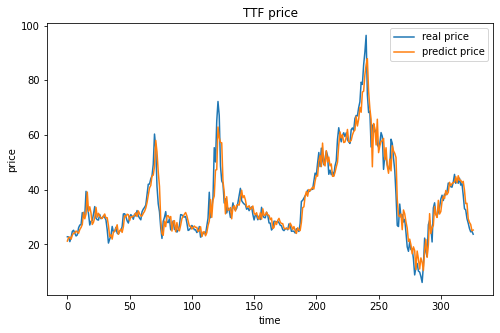

In [22]:
fig2=plt.figure(figsize=(8,5))
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('TTF price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [17]:
data_test=pd.read_csv("DATA_TEST.csv")
data_test.head()

,data,TTF,HH
0,2023/1/3,22.21,3.99
1,2023/1/4,19.54,4.17
2,2023/1/5,20.67,3.72
3,2023/1/6,20.70,3.71
4,2023/1/9,23.02,3.91


In [18]:
price_test=data_test.loc[:,'TTF']
price_test.head()

0    22.21
1    19.54
2    20.67
3    20.70
4    23.02
Name: TTF, dtype: float64

In [19]:
price_test_norm=price_test/max(price)

In [20]:
X_test_norm,y_test_norm=extract_data(price_test_norm,time_step)
print(X_test_norm.shape,len(y_test_norm))

(43, 6, 1) 43


In [21]:
y_test_predict=model.predict(X_test_norm)*max(price)
y_test=[i*max(price) for i in y_test_norm]

2/2 [==============================] - 0s 8ms/step


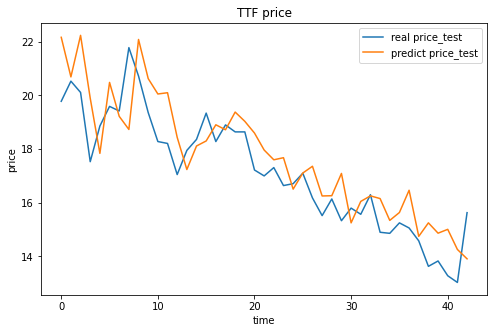

In [24]:
fig3=plt.figure(figsize=(8,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title('TTF price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [25]:
result_y_test=np.array(y_test).reshape(-1,1)
result_y_test_predict=y_test_predict
print(result_y_test.shape,result_y_test_predict.shape)

(43, 1) (43, 1)


In [28]:
result=np.concatenate((result_y_test,result_y_test_predict),axis=1)
result.shape

(43, 2)

In [31]:
result_df=pd.DataFrame(result,columns=["real_price_test","predict_price_test"])
result_df.to_csv("result.csv")

In [32]:
result_df

,real_price_test,predict_price_test
0,19.78,22.164730
1,20.53,20.689215
2,20.11,22.237202
3,17.53,19.894951
4,18.86,17.839602
5,19.59,20.483398
6,19.42,19.220156
7,21.78,18.731108
8,20.72,22.083878
9,19.36,20.625816


In [33]:
from google.colab import files
files.download("result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>